In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

### Turbulent velocity profile
We will develop a velocity profile in a turbulent flow using *The Law of the Wall*.

As with our laminar velocity profile, we will relate shear stress $\tau$ with velocity gradient $dU/dz$.

\begin{equation}
\tau = \rho \kappa \frac{dU}{dz}
\end{equation}

where $\kappa$ is eddy viscosity in units of $[m^2/s]$. 

\begin{equation}
\kappa = k u_* z
\end{equation}
where $k$ is vonKarman's constant (equal to 0.04), $z$ is height above the bed, and $u_*$ is shear velocity in units of $[m/s]$. Shear velocity $u_*$ is a characteristic velocity equal to $ \sqrt{\tau_0/\rho}$. Shear velocity is essentially shear stress expressed in units of velocity.

If we rearrange the equations above, strain rate becomes:

\begin{equation}
\frac{dU}{dz} = \frac{u_*}{kz}
\end{equation}

We will integrate the equation with a boundary condition of $U$ approaches 0 at a height $z_0$ above the bed. $z_0$ is known as Nikuradse's roughness. In natural systems, Nikuradse's roughness, $z_0$, is approximated by 

\begin{equation}
z_0 = D_{84}/10
\end{equation}

where $D_{84}$ is the diameter of the largest sediment grains on the river bed.

Finally we get:

\begin{equation}
\bar U = \frac{u_*}{k}ln\left(\frac{z}{z_0}\right)
\end{equation}

This is the famous Law of the Wall

In [2]:
## Variables needed for a turbulent velocity profile

rho=1000.    #density, kg/m^3
g=9.81    #gravity, m/s^2
mu=0.001    #dynamic viscosity of water
u_star=0.04    #ustar is shear velocity, but really shear stress expressed in units of velocity
z0=0.002    #depth where flow velocity is zero. See A&Apg. 386
k=0.4    #vonKarman's constant
zt=np.arange(0., 1., 0.01)    #depths where we will calculate turbulent flow

In [3]:
Ut=u_star/k*(np.log(zt/z0))    # equation for vertical velocity profile in a turbulent flow

C:\Users\langston\AppData\Local\Temp\ipykernel_25720\1517350210.py:1: RuntimeWarning: divide by zero encountered in log
  Ut=u_star/k*(np.log(zt/z0))    # equation for vertical velocity profile in a turbulent flow


In [4]:
Utm=u_star/k*(np.log(max(zt)/z0)-1)    #spatial mean velocity of turbulent profile A&Apg388
ztm=0.37*max(zt)     #depth of mean velocity, for plotting

Text(0.5, 1.0, 'Velocity Profile for Turbulent Flow')

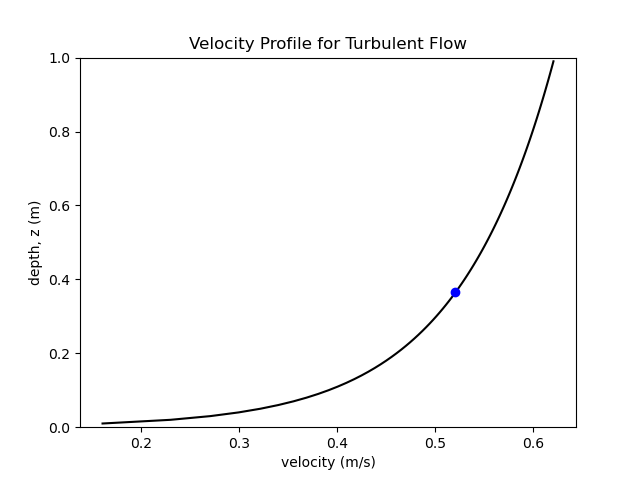

In [5]:
############# plotting turbulent profile
plt.figure()
plt.plot(Ut, zt, 'k-')
plt.plot(Utm, ztm, 'bo')
plt.xlabel('velocity (m/s)')
plt.ylabel('depth, z (m)')
plt.ylim([0,1])
plt.title("Velocity Profile for Turbulent Flow")

### Comparing laminar vs. turbulent velocity profiles

Now let's plot the laminar velocity profile and turbulent velocity profile on the same figure. First we have to normalize the velocity profiles so that we can see them on the same figure.

In [6]:
# Variables and transformations needed to plot laminar and turbulent velocity profiles on the same figure.

S=0.005    #slope for laminar flow
H=0.01    #height of laminar flow
zl=np.arange(0,0.01, 0.0001)    #depth for laminar

Ul=rho*g*S/mu*(H*zl-(zl**2/2))
Ulm=rho*g*S/mu*((H**2)/3)    #mean velocity of laminar profile

Uln=Ul/Ulm    #laminar profile normalized with mean velocity.zl=np.arange(0,0.01, 0.0001)    #depth for laminar

Uln=Ul/Ulm    #laminar profile normalized with mean velocity. 
Utn=Ut/Utm    #turbulent profile normalized with mean velocity. 
zln=zl/max(zl)    #normalized laminar depth
ztn=zt/max(zt)    #normalized turbulent depth

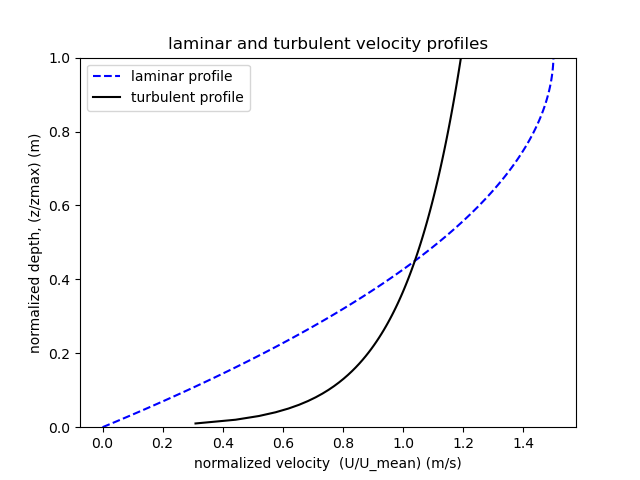

In [7]:
plt.figure()
plt.plot(Uln, zln, 'b--', label="laminar profile")
plt.plot(Utn, ztn, 'k-', label="turbulent profile")
plt.xlabel('normalized velocity  (U/U_mean) (m/s)')
plt.ylabel('normalized depth, (z/zmax) (m)')
plt.title("laminar and turbulent velocity profiles")
plt.ylim([0., 1.])
plt.legend()

### Plotting turbulent profiles with changes in $u^*$, $z_0$

* The variable $u^*$ is the shear velocity and $z_0$ is the roughness height. 
* $u^*$ is equivalent the basal shear stress, $\tau_0 = \rho g H S$\
* $z_0$ is the roughness height. In natural systems, this is equivilent to the size of the rocks on the river bed.

Below, we are going to change the values of $u^*$, $z_0$ to see how this changes our velocity profile. 

In [8]:
# Ut is the turbulent velocity profile that we calculated above with u* = 0.04 and z_0 = 0.002
u_star = 0.04
z0 = 0.002    #this is equivalent to D84 = 20mm
Ut=u_star/k*(np.log(zt/z0))    # equation for vertical velocity profile in a turbulent flow

C:\Users\langston\AppData\Local\Temp\ipykernel_25720\4203587504.py:4: RuntimeWarning: divide by zero encountered in log
  Ut=u_star/k*(np.log(zt/z0))    # equation for vertical velocity profile in a turbulent flow


### Changing shear velocity
In the cell below, let's increase the value of $u^*$, shear velocity. How much are you going to increase this value? What's enough so that you can see a difference in the velocity profile?


In [14]:
u_star2=0.07
Utust=u_star2/k*(np.log(zt/z0))

C:\Users\langston\AppData\Local\Temp\ipykernel_25720\3352615078.py:2: RuntimeWarning: divide by zero encountered in log
  Utust=u_star2/k*(np.log(zt/z0))


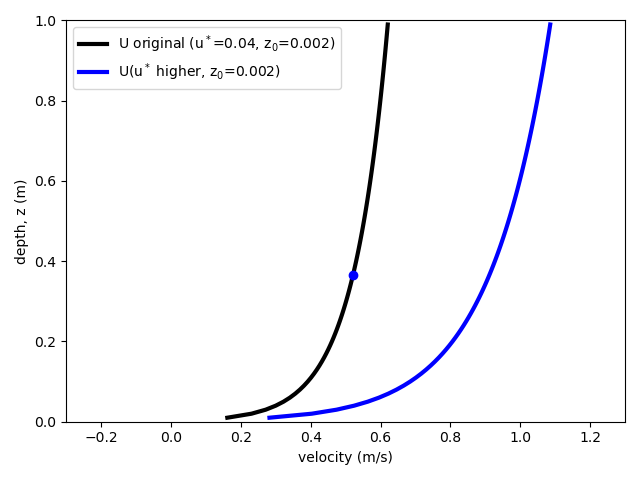

In [15]:
plt.figure()
plt.plot(Ut, zt, 'k-', linewidth=3, label="U original (u$^*$=0.04, z$_0$=0.002)")
plt.plot(Utm, ztm, 'bo')
plt.plot(Utust, zt, 'b-', linewidth=3, label="U(u$^*$ higher, z$_0$=0.002)")
plt.xlim([-0.3, 1.3])
plt.xlabel('velocity (m/s)')
plt.ylabel('depth, z (m)')
plt.ylim([0,1])
plt.legend()
plt.tight_layout()

### Changing roughness height
Now in the cell below, let's set the value of $u^*$ back to the original, and increase the value of $z_0$. What is a reasonable value of $z_0$, recalling that $z_0 = D_{84}/10$? ($D_{84}$ is the largest grain size fraction on the river bed.)


In [16]:
z02=0.02

u_star2=0.04
zt2=np.arange(0, 1., z02)
Utz=u_star/k*(np.log(zt/z02))

C:\Users\langston\AppData\Local\Temp\ipykernel_25720\765668073.py:5: RuntimeWarning: divide by zero encountered in log
  Utz=u_star/k*(np.log(zt/z02))


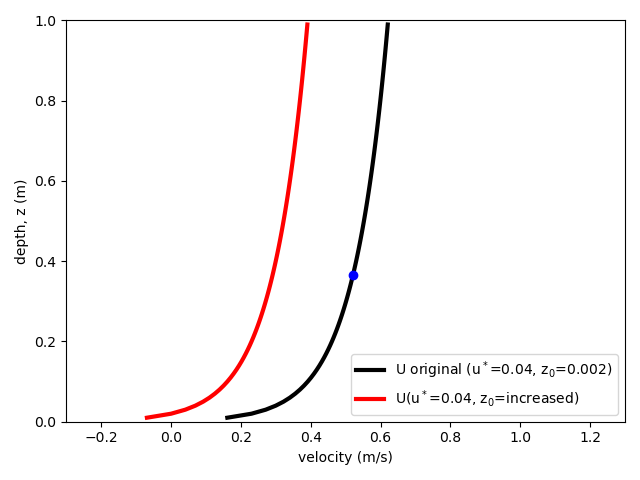

In [17]:
plt.figure()
plt.plot(Ut, zt, 'k-', linewidth=3, label="U original (u$^*$=0.04, z$_0$=0.002)")
plt.plot(Utm, ztm, 'bo')
plt.plot(Utz, zt, 'r-', linewidth=3, label="U(u$^*$=0.04, z$_0$=increased)")
plt.xlim([-0.3, 1.3])
plt.xlabel('velocity (m/s)')
plt.ylabel('depth, z (m)')
plt.ylim([0,1])
plt.legend()
plt.tight_layout()

In the cell below, you can plot all three velocity profiles together. 

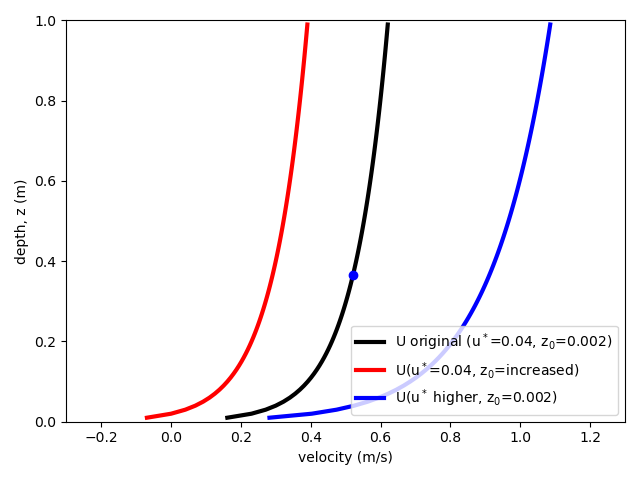

In [18]:
plt.figure()
plt.plot(Ut, zt, 'k-', linewidth=3, label="U original (u$^*$=0.04, z$_0$=0.002)")
plt.plot(Utm, ztm, 'bo')
plt.plot(Utz, zt, 'r-', linewidth=3, label="U(u$^*$=0.04, z$_0$=increased)")
plt.plot(Utust, zt, 'b-', linewidth=3, label="U(u$^*$ higher, z$_0$=0.002)")

plt.xlim([-0.3, 1.3])
plt.xlabel('velocity (m/s)')
plt.ylabel('depth, z (m)')
plt.ylim([0,1])
plt.legend()
plt.tight_layout()